                           std    AR(1)  Corr w Output
diff Real GDP          0.00907  0.35310        1.00000
diff real consumption  0.00472  0.27747        0.50817
diff Real Investment   0.01973  0.23685        0.88342
diff Labor Hours       0.00783  0.55935        0.48603
diff real wage         0.00618  0.08756        0.10572
inflation              0.00593  0.90020       -0.24158
Fed Funds              0.00816  0.95522       -0.14258


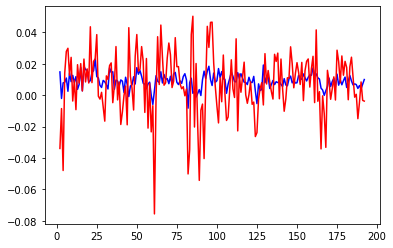

In [154]:
import pandas as pd
import numpy as np

data_ngdp = pd.read_csv("table115_ngdp_raw.csv",index_col=0,header=None).T

#remove space at beginning of strings
data_ngdp.columns = data_ngdp.columns.str.lstrip()

#rename some columns
data_ngdp['services_con'] = data_ngdp.iloc[:,7]

#merging columns year and quarter
data_ngdp['Period'] = data_ngdp['Year'].astype(str) + data_ngdp['quarter'].astype(str)

#print(data_ngdp.head())
#print(data_ngdp.columns)

data_deflator = pd.read_csv('table119_deflator_raw.csv',index_col=0,header=None).T
data_deflator.columns = data_deflator.columns.str.lstrip()

data_fedfunds = pd.read_csv('FEDFUNDS.CSV')
data_laborhours = pd.read_csv('HOANBS.csv')
data_wage = pd.read_csv('COMPNFB.csv')


data_mediumscale = pd.DataFrame()
data_mediumscale["Year"] = data_ngdp["Period"]


data_mediumscale['Real GDP'] = (data_ngdp['Gross domestic product'].astype(float) - data_ngdp['Net exports of goods and services'].astype(float))/data_deflator['Gross domestic product'].astype(float)
data_mediumscale['log Real GDP'] = np.log(data_mediumscale['Real GDP'])
data_mediumscale['diff Real GDP'] = data_mediumscale['log Real GDP'].diff()


data_mediumscale['Real Consumption'] = (data_ngdp['Personal consumption expenditures'].astype(float) - data_ngdp['Durable goods'].astype(float))/data_deflator['Gross domestic product'].astype(float)
data_mediumscale['log Real Consumption'] = np.log(data_mediumscale['Real Consumption'])
data_mediumscale['diff real consumption'] = data_mediumscale['log Real Consumption'].diff()

data_mediumscale['Real Investment'] = ( data_ngdp['Nondurable goods'].astype(float) +  data_ngdp['Gross private domestic investment'].astype(float) ) /data_deflator['Gross domestic product'].astype(float)
data_mediumscale['log Real Investment'] = np.log(data_mediumscale['Real Investment'])
data_mediumscale['diff Real Investment'] = data_mediumscale['log Real Investment'].diff()

data_mediumscale['Real Gov expenditure'] = data_ngdp['Government consumption expenditures and gross investment'].astype(float)/data_deflator['Gross domestic product'].astype(float) 
data_mediumscale['Fed Funds'] = data_fedfunds['FEDFUNDS']/400

data_mediumscale['Labor Hours'] = data_laborhours['HOANBS']
data_mediumscale['log Labor Hours'] = np.log(data_mediumscale['Labor Hours'])
data_mediumscale['diff Labor Hours'] = data_mediumscale['log Labor Hours'].diff()

data_mediumscale['real Wage'] = data_wage['COMPNFB'].astype(float)/data_deflator['Gross domestic product'].astype(float)
data_mediumscale['log real wage'] = np.log(data_mediumscale['real Wage'])
data_mediumscale['diff real wage'] = data_mediumscale['log real wage'].diff()

data_mediumscale['log price deflator'] = np.log(data_deflator['Gross domestic product'].astype(float))
data_mediumscale['inflation'] = data_mediumscale['log price deflator'].diff()

#print(data_mediumscale.head())

moments_mediumscale=pd.DataFrame()
moments_mediumscale['std'] = data_mediumscale[['diff Real GDP','diff real consumption','diff Real Investment','diff Labor Hours','diff real wage','inflation','Fed Funds']].std(axis=0,skipna=True)

#calculate autocorrelation lag 1
s0 = np.corrcoef(data_mediumscale['diff Real GDP'][1:-1], data_mediumscale['diff Real GDP'][2:])[0,1]
s1 = np.corrcoef(data_mediumscale['diff real consumption'][1:-1], data_mediumscale['diff real consumption'][2:])
s2 = np.corrcoef(data_mediumscale['diff Real Investment'][1:-1], data_mediumscale['diff Real Investment'][2:])
s3 = np.corrcoef(data_mediumscale['diff Labor Hours'][1:-2], data_mediumscale['diff Labor Hours'][2:-1])
s4 = np.corrcoef(data_mediumscale['diff real wage'][1:-2], data_mediumscale['diff real wage'][2:-1])
s5 = np.corrcoef(data_mediumscale['inflation'][1:-1], data_mediumscale['inflation'][2:])
s6 = np.corrcoef(data_mediumscale['Fed Funds'][0:-2], data_mediumscale['Fed Funds'][1:-1])

moments_mediumscale['AR(1)'] = [s0,s1[0,1],s2[0,1],s3[0,1],s4[0,1],s5[0,1],s6[0,1]]

#compute correlation with output
g0 = data_mediumscale.corr()
moments_mediumscale['Corr w Output'] = [g0.loc['diff Real GDP','diff Real GDP'],g0.loc['diff Real GDP','diff real consumption'],g0.loc['diff Real GDP','diff Real Investment'],g0.loc['diff Real GDP','diff Labor Hours'],g0.loc['diff Real GDP','diff real wage'],g0.loc['diff Real GDP','inflation'],g0.loc['diff Real GDP','Fed Funds']]

moments_mediumscale = moments_mediumscale.round(5)
print(moments_mediumscale)

data_mediumscale.to_csv('data_mediumscale.csv')
moments_mediumscale.to_csv('moments_mediumscale.csv')

import matplotlib.pyplot as plt
plt.plot(data_mediumscale['diff real consumption'],'b')
plt.plot(data_mediumscale['diff Real Investment'],'r')
plt.savefig('consVinv.pdf')
plt.show()
